# Lab 5: Exploring Data

# Instructor: Li Zeng (lizeng@uw.edu)


Learning Objectives:

The lab leads you to pratice how to perform exploratory data analysis. You will get hands-on experiences in
1. Formulating a question
2. Inspecting data
3. Exploring data

You will follow the demo on a basic EDA on an example dataset on all flights that departed NYC (i.e. JFK, LGA or EWR) in 2013. You can download the dataset from canvas (flights.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### Import and Inspect Data

In [2]:
# Import data
flights_df= pd.read_csv('flights.csv')

In [3]:
# Look at top and bottom
print(flights_df.head())
print(flights_df.tail())

   Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771      336772  20

In [4]:
# Look at structure, check n’s
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# Look at descriptive stats and check for missing values
print(flights_df.describe())

          Unnamed: 0      year          month            day       dep_time  \
count  336776.000000  336776.0  336776.000000  336776.000000  328521.000000   
mean   168388.500000    2013.0       6.548510      15.710787    1349.109947   
std     97219.001466       0.0       3.414457       8.768607     488.281791   
min         1.000000    2013.0       1.000000       1.000000       1.000000   
25%     84194.750000    2013.0       4.000000       8.000000     907.000000   
50%    168388.500000    2013.0       7.000000      16.000000    1401.000000   
75%    252582.250000    2013.0      10.000000      23.000000    1744.000000   
max    336776.000000    2013.0      12.000000      31.000000    2400.000000   

           dep_delay       arr_time      arr_delay         flight  \
count  328521.000000  328063.000000  327346.000000  336776.000000   
mean       12.639070    1502.054999       6.895377    1971.923620   
std        40.210061     533.264132      44.633292    1632.471938   
min       -4

After inspecting the data and reading the data documentation (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf), we can conclude that this data was collected
by the Bureau of Transportation Statistics. The data themselves are reported to the U.S. Department of
Transportation (DOT), Bureau of Transportation Statistics (BTS) by the 14 U.S. air carriers that have at
least 1% of total domestic scheduled-service passenger revenues. The following variables are available in this
data:

* year, month, day: date of departure
* dep_time, arr_time: departure and arrival times, local time zone
* dep_delay, arr_delay: departure and arrival delays, in minutes. Negative times represent early
departures/arrivals.
* carrier: two letter carrier abbreviation. See airlines to get full names.
* tailnum: plane tail number, used to identify aircraft
* flight: flight number
* origin, dest: origin and destination. See airports for additional metadata.
* air_time: amount of time spent in the air
* distance: distance flown
* hour, minute: time of departure

Looking at a summary of the data, we see that most variables are numeric data types, while carrier, tailnum,
origin and dest are character types. We also see there is missing data on flight information such as air_time
and departure/arrival statistics.

### Formulate Questions and Explore Data
Flights are often delayed. Let's formulate some questions around delayed flights aiming to better
understand when flight delays occur and why. This questions are likely of interest to travelers who do not
like to spend time at the airport.

#### 1. Which date has the largest average arrival delay?

In [6]:
flights_df['date']=pd.to_datetime(flights_df[['year','month','day']],format='%Y%m%d')
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


In [7]:
# arrival delay
arr_delay_series = flights_df.groupby('date')['arr_delay'].mean()

C:\Users\Manisha\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


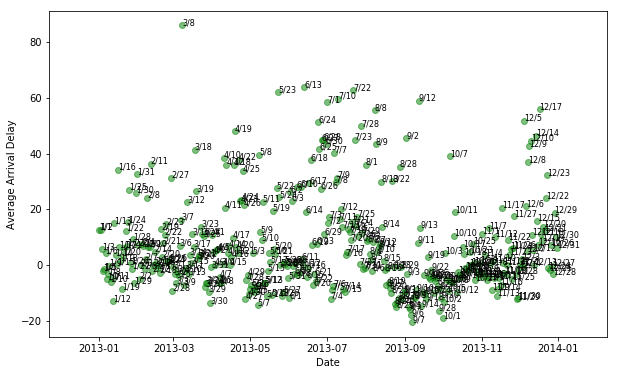

In [8]:
# graphical method 
fig, ax = plt.subplots(figsize= (10,6))
x = arr_delay_series.index
y = arr_delay_series.values
ax.scatter(x, y, color = 'green', alpha=0.5)
for i, txt in enumerate(arr_delay_series.index):
    ax.annotate("/".join([str(txt.month),str(txt.day)]), (x[i], y[i]), fontsize=8)
ax.set(xlabel = 'Date', ylabel = 'Average Arrival Delay')
plt.show()

In [9]:
# non-graphical method
arr_delay_series.sort_values(ascending=False).head(1)

date
2013-03-08    85.862155
Name: arr_delay, dtype: float64

Response: For flights from NYC in 2013, March, 8th, 2013 had largest average arrival delay.

#### Your turn: Which date has the largest average departure delay? 

In [10]:
# departure delay
dep_delay_series = flights_df.groupby('date')['dep_delay'].mean()

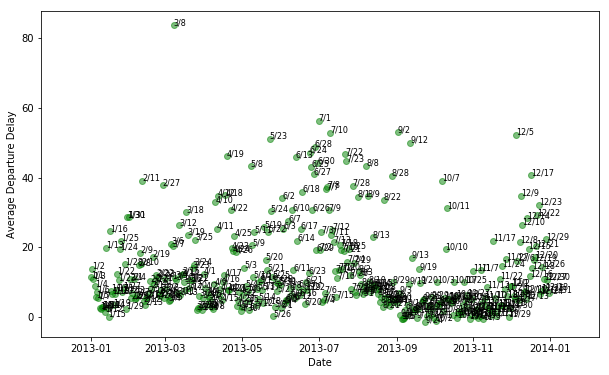

In [11]:
# graphical method 
fig, ax = plt.subplots(figsize= (10,6))
x = dep_delay_series.index
y = dep_delay_series.values
ax.scatter(x, y, color = 'green', alpha=0.5)
for i, txt in enumerate(dep_delay_series.index):
    ax.annotate("/".join([str(txt.month),str(txt.day)]), (x[i], y[i]), fontsize=8)
ax.set(xlabel = 'Date', ylabel = 'Average Departure Delay')
plt.show()

In [12]:
# Largest average departure delay date
dep_delay_series = flights_df.groupby('date')['dep_delay'].mean()
dep_delay_series.sort_values(ascending=False).head(1)

date
2013-03-08    83.536921
Name: dep_delay, dtype: float64

Response: For Flights from NYC in 2013, March, 8th, 2013 has the largest average departure delay.

#### What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?

There are many ways to define the "worst" day to fly out of NYC in 2013. We might say the
worst day is the one with the largest average departure delay and the longest average arrival delay.

In [13]:
delay_series=pd.DataFrame()
delay_series['avg_dep_delay']=flights_df.groupby('date')['dep_delay'].mean()
delay_series['avg_arr_delay']=flights_df.groupby('date')['arr_delay'].mean()
print (delay_series.head())

            avg_dep_delay  avg_arr_delay
date                                    
2013-01-01      11.548926      12.651023
2013-01-02      13.858824      12.692888
2013-01-03      10.987832       5.733333
2013-01-04       8.951595      -1.932819
2013-01-05       5.732218      -1.525802


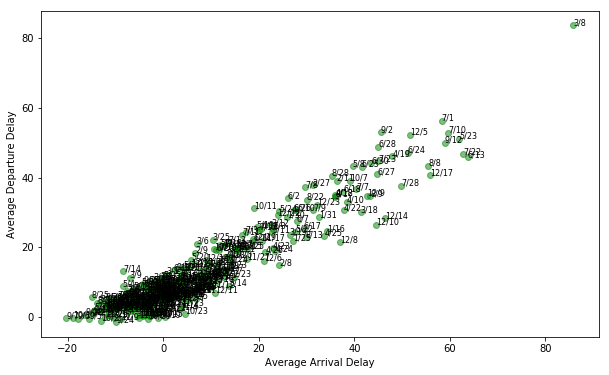

In [14]:
fig, ax = plt.subplots(figsize= (10,6))

x = delay_series['avg_arr_delay'].values
y = delay_series['avg_dep_delay'].values
ax.scatter(x, y, color = 'green', alpha=0.5)
for i, txt in enumerate(delay_series.index):
    ax.annotate("/".join([str(txt.month),str(txt.day)]), (x[i], y[i]), fontsize=8)
ax.set(xlabel = 'Average Arrival Delay', ylabel = 'Average Departure Delay')
plt.show()

#### Your turn: What was the worst day in terms of total number of departure flights delayed.

In [15]:
# Calculate the total number of flights with departure delays
dep_delay= flights_df[flights_df['dep_delay']>0]
dep_delay = pd.DataFrame(dep_delay.groupby('date').count())
dep_delay.reset_index(level=0,inplace=True)

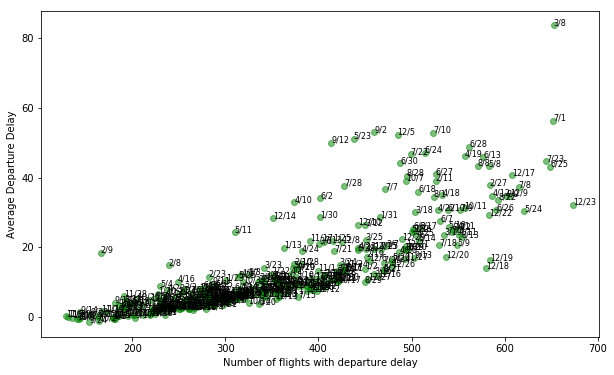

In [16]:
fig, ax = plt.subplots(figsize= (10,6))

x = dep_delay['Unnamed: 0'].values
y = delay_series['avg_dep_delay'].values
ax.scatter(x, y, color = 'green', alpha=0.5)
for i, txt in enumerate(delay_series.index):
    ax.annotate("/".join([str(txt.month),str(txt.day)]), (x[i], y[i]), fontsize=8)
ax.set(xlabel = 'Number of flights with departure delay', ylabel = 'Average Departure Delay')
plt.show()

Response: Hence we see most number of fligts delayed for the date 12/23/2013. 

#### Are there any seasonal patterns in departure delays for flights from NYC?

In [17]:
delay_by_month_series = flights_df.groupby('month')['dep_delay'].mean()

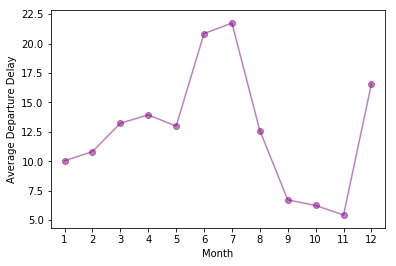

In [18]:
x = delay_by_month_series.index
y = delay_by_month_series.values
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Month', ylabel = 'Average Departure Delay')
ax.set_xlim([0.5,12.5])
ax.set_xticks(np.arange(1,13))
plt.show()

Response: Overall departure delays from NYC are increasing from January through July, and lowest from August through the end of November. This indicates that the autumn may have lower average departure delays for flights from NYC.

#### Your turn: On average, how do departure delays vary over the course of a day?

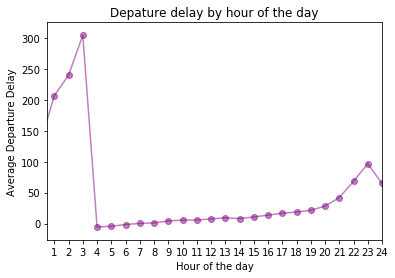

In [19]:
# Group and evaluate average departure delay by hour of the day
hour_dep_delay = pd.Series(flights_df.groupby('hour')['dep_delay'].mean())
hour_dep_delay[0:]

# Plot departure delay by hour of the day 
x = hour_dep_delay.index
y = hour_dep_delay
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Hour of the day', ylabel = 'Average Departure Delay',title='Depature delay by hour of the day')
ax.set_xlim([0.5,12.5])
ax.set_xticks(np.arange(1,25))
plt.show()

Response: We see high average departure delays during late night and early mornings and then fairly less departure delays during the day time and evenings. It could be due to the fact that late night and early morning could have low visibility and difficult ot navigate during that time leading to flight delays.

### The Final Exercise

Formulate a motivating question you want to explore using this data. Describe why it is interesting and perform an exploratory data analysis designed to address the question.

#### Research Question: Which carriers from NYC were the best performers in year 2013 in terms of delays and which carrier would you select for flying from NYC?

   carrier  dep_delay
12      US   3.782418
8       HA   4.900585
2       AS   5.804775
1       AA   8.586016
4       DL   9.264505
9       MQ  10.552041
11      UA  12.106073
10      OO  12.586207
13      VX  12.869421
3       B6  13.022522
0       9E  16.725769
14      WN  17.711744
7       FL  18.726075
15      YV  18.996330
5       EV  19.955390
6       F9  20.215543


   carrier  arr_delay
2       AS  -9.930889
8       HA  -6.915205
1       AA   0.364291
4       DL   1.644341
13      VX   1.764464
12      US   2.129595
11      UA   3.558011
0       9E   7.379669
3       B6   9.457973
14      WN   9.649120
9       MQ  10.774733
10      OO  11.931034
15      YV  15.556985
5       EV  15.796431
7       FL  20.115906
6       F9  21.920705


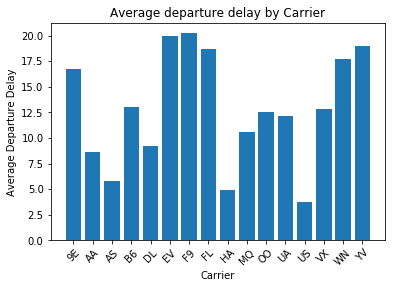

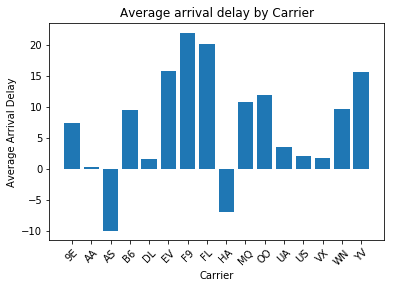

In [20]:
flights_df_agg = pd.DataFrame(flights_df.groupby('carrier').mean())
flights_df_agg.reset_index(level=0,inplace=True)
flights_df_agg = flights_df_agg.sort_values('dep_delay')
print(pd.DataFrame(flights_df_agg, columns=['carrier','dep_delay']))

print("\n")
flights_df_agg = flights_df_agg.sort_values('arr_delay')
print(pd.DataFrame(flights_df_agg, columns=['carrier','arr_delay']))

d = pd.DataFrame(flights_df_agg.groupby('carrier').mean())

x = list(range(0,len(d.index.values)))
xTicks = list(d.index.values)
y = list(d['dep_delay'].values)
plt.xticks(x, xTicks)
plt.xticks(range(len(d.index.values)), xTicks, rotation=45)
plt.bar(x,y)
plt.xlabel("Carrier")
plt.ylabel("Average Departure Delay")
plt.title("Average departure delay by Carrier")
plt.show()

x = list(range(0,len(d.index.values)))
xTicks = list(d.index.values)
y = list(d['arr_delay'].values)
plt.xticks(x, xTicks)
plt.xticks(range(len(d.index.values)), xTicks, rotation=45)
plt.bar(x,y)
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay")
plt.title("Average arrival delay by Carrier")
plt.show()

         avg_delay
carrier           
AS       -2.042837
HA       -1.007310
US        2.976576
AA        4.502259
DL        5.482873
VX        7.389398
UA        7.890995
MQ       10.715892
B6       11.271622
9E       12.227549
OO       12.258621
WN       13.718406
YV       17.328440
EV       17.943901
FL       19.478193
F9       21.074047


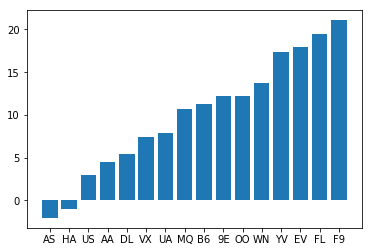

In [21]:
flights_df['avg_delay'] = flights_df[['dep_delay','arr_delay']].mean(axis=1)
h = pd.DataFrame(flights_df.groupby('carrier')['avg_delay'].mean())
e = h.sort_values('avg_delay')
print(e)


x = list(range(0,len(e.index.values)))
xTicks = list(e.index.values)
y = list(e['avg_delay'].values)
plt.xticks(x,xTicks)
plt.xticks(range(len(e.index.values)),xTicks)
plt.bar(x,y)
plt.show()

  carrier  Unnamed: 0
0      OO           9
1      HA          69
2      AS         226
3      YV         233
4      F9         341
5      FL        1654
6      VX        2225
7      US        4775
8      WN        6558
9      9E        7063


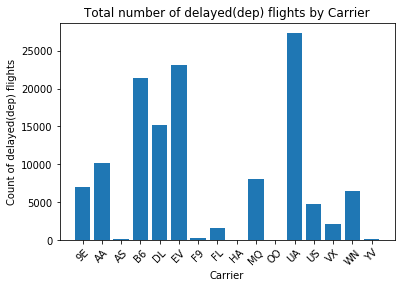

In [22]:
dep_delay = flights_df[flights_df['dep_delay'] > 0]
d = pd.DataFrame(dep_delay.groupby('carrier').count())

f = pd.DataFrame(d.sort_values('Unnamed: 0'))
f.reset_index(level=0,inplace=True)
print(pd.DataFrame(f,columns=['carrier','Unnamed: 0']).head(10))

x = list(range(0,len(d.index.values)))
xTicks = list(d.index.values)
y = list(d['Unnamed: 0'].values)
plt.xticks(x, xTicks)
plt.xticks(range(len(d.index.values)), xTicks, rotation=45)
plt.bar(x,y)
plt.xlabel("Carrier")
plt.ylabel("Count of delayed(dep) flights")
plt.title("Total number of delayed(dep) flights by Carrier")
plt.show()

Here is the summary of how the carrier are performing in the year 2013 for the flights travelling from NYC airports.

The top 6 carriers with the minimum departure delay are:
* US - 3.782418
* HA - 4.900585
* AS - 5.804775
* AA - 8.586016
* DL - 9.264505
* MQ - 10.552041

If someone doesn't like departure delays they can pick the 'US' carrier as they have the least departure delay (3.78 approx.).

Similarly, the top 6 carriers with minimum arrival delay are:
* AS  -9.930889
* HA  -6.915205
* AA   0.364291
* DL   1.644341
* VX   1.764464
* US   2.129595

If someone doesn't like arrival delays they can pick the 'AS' carrier as they have the least arrival delay (-9.93 approx.) which mean they arrive early.

The best carrier with minimum total average delay is 'AS' with -2.06 mins. That means on average, they arrive early. The top 6 performer in this category would be:
* AS -2.063057
* HA -1.007310
* US  2.956007
* AA  4.475153
* DL  5.454423
* VX  7.316943

The top 6 carriers with least number of flights with departure delays:
0. OO: 9 mins
1. HA: 69 mins
2. AS: 226 mins
3. YV: 233 mins
4. F9: 341 mins
5. FL: 1654 mins

Additionally, looks like flights by carrier 'UA' have a bad reputation for having departure delays. Hence, if you do not like delayed flights then advise would be to avoid 'UA' carrier flights.

Based on the analysis above, carrier 'AS' seems to be performing fairly well in terms of 'Departure delays', 'Arrival Delays', 'Total Average Delay' and 'Number of Flights delayed(dep)'. Hence, if I were to choose a carrier then it would be 'AS'(purely based on delay factors).